In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import formatting.VMC_colors as vc
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.ticker import PercentFormatter
from scipy.stats import gaussian_kde

plt.style.use(['formatting/vmc_colors.mplstyle', 'formatting/publication.mplstyle'])
export_dpi = 300

**Table of contents**<a id='toc0_'></a>    
  - [Kinetics Visualizations](#toc1_1_)    
      - [$T_{crit}$ Isocontours, Fig 3A](#toc1_1_1_1_)    
      - [$\frac{d\eta}{dT}$ Isocontours, various alpha,  SI fig](#toc1_1_1_2_)    
      - [$\frac{d\eta}{dT}$ Isocontours, Fig  3b](#toc1_1_1_3_)    
  - [Thermodynamic Visualizations](#toc1_2_)    
      - [Fig 4a](#toc1_2_1_1_)    
  - [Kinetic + Thermodynamic Visualizations](#toc1_3_)    
    - [Representative Visualizations](#toc1_3_1_)    
      - [Three Cases of $\phi_{eq}$ vs. T, Fig 4b](#toc1_3_1_1_)    
      - [$\frac{d\eta}{dT}$, Fig 2](#toc1_3_1_2_)    
    - [Specific Reaction Visualizations](#toc1_3_2_)    
      - [Overall Potential Curves, Figure 4 C](#toc1_3_2_1_)    
      - [Construction of Curves, SI Fig](#toc1_3_2_2_)    
  - [Power Visualizations](#toc1_4_)    
      - [Unavoidable Heat to Reactant Heating Requirement, Water Splitting, Fig 5c](#toc1_4_1_1_)    
      - [Excess Power Requirement, Water Splitting, SI Fig](#toc1_4_1_2_)    
      - [Unavoidable Heat to Reactant Heating Requirement, CO2R to C2H4 with OER, Fig 5c](#toc1_4_1_3_)    
      - [Excess Power Requirement, CO2R to C2H4 with OER, SI Fig](#toc1_4_1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Using Literature Data to Generate Kinetic, Thermodynamic, and Power visualizations](#toc0_)

## <a id='toc1_1_'></a>[Kinetics Visualizations](#toc0_)

In [2]:
df_kin = pd.read_excel("SI_tables.xlsx", sheet_name = "Half Rxn Kinetics")
df_rxns = pd.read_excel("SI_tables.xlsx", sheet_name = "Full Reactions")

In [3]:
F = 96485 # C/mole electrons
R = 8.314 # J/mole K
RT = 298 # K

def T_crit(i, i0298, Ea):
    # Equation ____ from main text
    return Ea*RT/(Ea - RT*R*np.log(i/i0298))

def dndT(i, i0298, Ea, alpha):
    # Equation ____ from main text
    return R/(alpha*F)*(Ea/(RT*R)-np.log(i/i0298))

def plot_reaction(row_index, label, shape = "o", color = 'black', filled = True, current = 100, s=15):
    if not filled:
        facecolor = 'white'
    else: 
        facecolor = color
    row = df_kin.iloc[row_index, :]

    plt.scatter(current/row["i0298 mA/cm^2"], row["Ea,eff J/mol"]/1000, marker = shape, label = label, edgecolors = color, color = facecolor, s=s, lw=0.6,  zorder=3)

def plot_all_reactions(current, s=15):
    plot_reaction(0, r"$CO_2 \rightarrow CO$ on $Au$", color = "#5AB4E5", current = current, s=s)

    plot_reaction(1, r"$2 Cl^-\rightarrow Cl_2$ on $RuO_2(110)$", color = "#5A4A85", current = current, s=s)

    plot_reaction(2, r"KCl", shape = "D", color = "#D36027", current = current, s=s)
    plot_reaction(3, r"NaCl", shape = "v", color = "#D36027", current = current, s=s)
    plot_reaction(4, r"LiCl", shape = "s", color = "#D36027", current = current, s=s)

    plot_reaction(5, r"$Pt/C$", shape = "*", color = "#E5A024", current = current, s=s)
    plot_reaction(6, r"$Ir/C$", shape = "o", color = "#E5A024", current = current, s=s)
    plot_reaction(7, r"$Pd/C$", shape = "P", color = "#E5A024", current = current, s=s)
    plot_reaction(8, r"$Rh/C$", shape = "x", color = "#E5A024", current = current, s=s)

    plot_reaction(9, r"IrO2", shape = "o", color = "#CC79A7", filled = False, current = current, s=s)

    plot_reaction(10, r"RuO2, KOH", shape = "D", color = "#CC79A7", current = current, s=s)
    plot_reaction(11, r"RuO2, NaOH", shape = "v", color = "#CC79A7", current = current, s=s)
    plot_reaction(12, r"RuO2, LiOH", shape = "s", color = "#CC79A7")

    plot_reaction(13, r"LiOH", shape = "s", color = "#E5A024", filled = False, current = current, s=s)
    plot_reaction(14, r"NaOH", shape = "v", color = "#E5A024", filled = False, current = current, s=s)
    plot_reaction(15, r"KOH", shape = "D", color = "#E5A024", filled = False, current = current, s=s)
    plot_reaction(16, r"RbOH", shape = "^", color = "#E5A024", filled = False, current = current, s=s)
    plot_reaction(17, r"CsOH", shape = "o", color = "#E5A024", filled = False, current = current, s=s)

    plot_reaction(18, r"$CO_2 \rightarrow C_2H_4$ on $Cu$", shape = "o", color = "#0073B2", filled = True, current = current, s=s)

In [4]:
# Setting up Axes

i_ratios = np.logspace(-0.5, 15, 1000)
Eas = np.linspace(10, 130000, 1000)
i_sq, Ea_sq = np.meshgrid(i_ratios, Eas)
Tcrits = T_crit(i_sq, 1, Ea_sq)
T_masked = np.ma.masked_where((Tcrits<0)|(Tcrits>2000), Tcrits)


#### <a id='toc1_1_1_1_'></a>[$T_{crit}$ Isocontours, Fig 3A](#toc0_)

C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\824494008.py:20: UserWarning: You passed a edgecolor/edgecolors ('#E5A024') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(current/row["i0298 mA/cm^2"], row["Ea,eff J/mol"]/1000, marker = shape, label = label, edgecolors = color, color = facecolor, s=s, lw=0.6,  zorder=3)


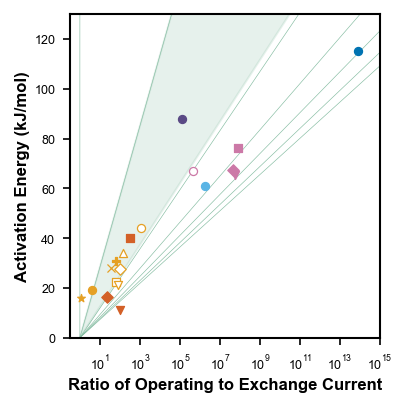

In [5]:

fig, ax = plt.subplots(figsize=(2.76, 2.76))

# Units converted to kJ/mol and degree C for plotting
CS = ax.contour(i_sq, Ea_sq/1000, T_masked-273,  levels = [25, 100, 300,  500, 700, 900, 1100], colors = "#84BCA1", linewidths = 0.3)

plt.fill_between(i_ratios, (373)*(RT*R*np.log(i_ratios))/(373-RT)/1000, (300+RT)*(RT*R*np.log(i_ratios))/(573-RT)/1000, alpha = 0.2, color = "#84BCA1")

plot_all_reactions(current = 100)

plt.ylim(0, 130)
plt.xscale("log")
#plt.legend()
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon = False)

ax.set_xlabel("Ratio of Operating to Exchange Current")
ax.set_ylabel("Activation Energy (kJ/mol)")
#plt.suptitle("Critical Temperature of Assorted Reactions \n Reactions plotted at $i=100 mA/cm^2$")
fig.tight_layout()
plt.savefig(r"figs\critT_publication.svg", bbox_inches='tight')

#### <a id='toc1_1_1_2_'></a>[$\frac{d\eta}{dT}$ Isocontours, various alpha,  SI fig](#toc0_)

C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\824494008.py:20: UserWarning: You passed a edgecolor/edgecolors ('#E5A024') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(current/row["i0298 mA/cm^2"], row["Ea,eff J/mol"]/1000, marker = shape, label = label, edgecolors = color, color = facecolor, s=s, lw=0.6,  zorder=3)


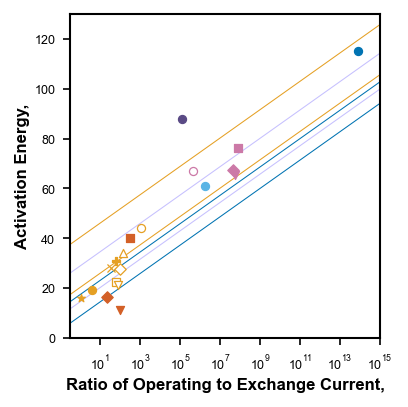

In [6]:

fig, ax = plt.subplots(figsize=(2.76, 2.76))
plt.contour(i_sq, Ea_sq/1000, dndT(i_sq, 1, Ea_sq, 0.3),  levels = [ 0.001, 0.002], linewidths = 0.5, colors = "#0073B2")
plt.contour(i_sq, Ea_sq/1000, dndT(i_sq, 1, Ea_sq, 0.5),  levels = [ 0.001, 0.002], linewidths = 0.5, colors = vc.get_color("light purple"))
plt.contour(i_sq, Ea_sq/1000, dndT(i_sq, 1, Ea_sq, 0.7),  levels = [ 0.001, 0.002], linewidths = 0.5, colors = "#E5A024")

plot_all_reactions(100)

plt.ylim(0, 130)
plt.xscale("log")
#plt.legend()


ax.set_xlabel("Ratio of Operating to Exchange Current,")
ax.set_ylabel("Activation Energy,")
#plt.suptitle("Critical Temperature of Assorted Reactions \n Reactions plotted at $i=100 mA/cm^2$")
fig.tight_layout()
plt.savefig(r"figs\dndT_alphadependence_publication.svg", bbox_inches='tight')

#### <a id='toc1_1_1_3_'></a>[$\frac{d\eta}{dT}$ Isocontours, Fig  3b](#toc0_)

C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\824494008.py:20: UserWarning: You passed a edgecolor/edgecolors ('#E5A024') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(current/row["i0298 mA/cm^2"], row["Ea,eff J/mol"]/1000, marker = shape, label = label, edgecolors = color, color = facecolor, s=s, lw=0.6,  zorder=3)


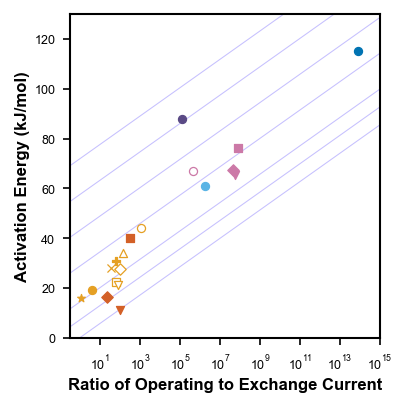

In [7]:
fig, ax = plt.subplots(figsize=(2.76, 2.76))
plt.contour(i_sq, Ea_sq/1000, dndT(i_sq, 1, Ea_sq, 0.5),  levels = [0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005], linewidths = 0.5, colors = vc.get_color("light purple"))

plot_all_reactions(100)

plt.ylim(0, 130)
plt.xscale("log")
#plt.legend()

#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon = False)

ax.set_xlabel("Ratio of Operating to Exchange Current")
ax.set_ylabel("Activation Energy (kJ/mol)")
#plt.suptitle("Critical Temperature of Assorted Reactions \n Reactions plotted at $i=100 mA/cm^2$")
fig.tight_layout()
plt.savefig(r"figs\dndT_publication.svg", bbox_inches='tight')

C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\824494008.py:20: UserWarning: You passed a edgecolor/edgecolors ('#E5A024') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(current/row["i0298 mA/cm^2"], row["Ea,eff J/mol"]/1000, marker = shape, label = label, edgecolors = color, color = facecolor, s=s, lw=0.6,  zorder=3)


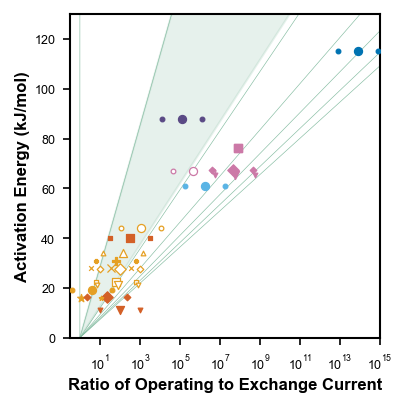

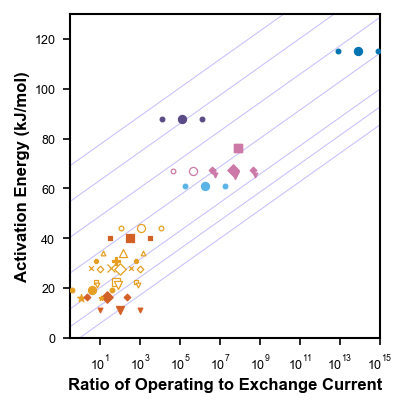

In [8]:
fig, ax = plt.subplots(figsize=(2.76, 2.76))
CS = ax.contour(i_sq, Ea_sq/1000, T_masked-273,  levels = [25, 100, 300,  500, 700, 900, 1100], colors = "#84BCA1", linewidths = 0.3)

plt.fill_between(i_ratios, (373)*(RT*R*np.log(i_ratios))/(373-RT)/1000, (300+RT)*(RT*R*np.log(i_ratios))/(573-RT)/1000, alpha = 0.2, color = "#84BCA1")

plot_all_reactions(100)
plot_all_reactions(1000, s = 5)
plot_all_reactions(10, s = 5)

plt.ylim(0, 130)
plt.xscale("log")
#plt.legend()

#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon = False)

ax.set_xlabel("Ratio of Operating to Exchange Current")
ax.set_ylabel("Activation Energy (kJ/mol)")
#plt.suptitle("Critical Temperature of Assorted Reactions \n Reactions plotted at $i=100 mA/cm^2$")
fig.tight_layout()
plt.savefig(r"figs\Tcrit_publication_multcurrent.svg", bbox_inches='tight')

fig, ax = plt.subplots(figsize=(2.76, 2.76))
plt.contour(i_sq, Ea_sq/1000, dndT(i_sq, 1, Ea_sq, 0.5),  levels = [0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005], linewidths = 0.5, colors = vc.get_color("light purple"))

plot_all_reactions(100)
plot_all_reactions(1000, s = 5)
plot_all_reactions(10, s = 5)

plt.ylim(0, 130)
plt.xscale("log")
#plt.legend()

#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon = False)

ax.set_xlabel("Ratio of Operating to Exchange Current")
ax.set_ylabel("Activation Energy (kJ/mol)")
#plt.suptitle("Critical Temperature of Assorted Reactions \n Reactions plotted at $i=100 mA/cm^2$")
fig.tight_layout()
plt.savefig(r"figs\dndT_publication_multcurrent.svg", bbox_inches='tight')

## <a id='toc1_2_'></a>[Thermodynamic Visualizations](#toc0_)
#### <a id='toc1_2_1_1_'></a>[Fig 4a](#toc0_)

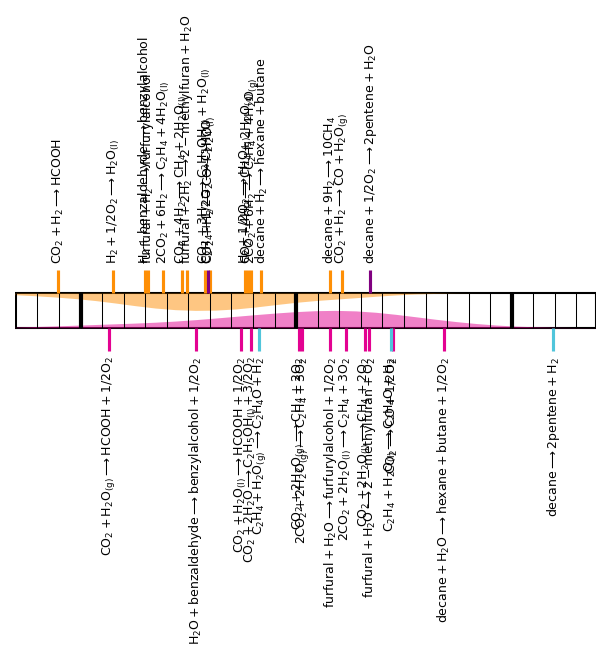

In [9]:
def format_for_latex(s):
    s = s.replace('(l)', r'_{(l)}').replace('(g)', r'_{(g)}').replace('->', r'\longrightarrow')
    return fr'$\mathrm{{{s}}}$'
df_rxns['latex_reaction'] = df_rxns['reaction'].apply(format_for_latex)


fig, ax = plt.subplots(figsize=(5, 2))
fs=6
# Define range and rectangle properties
x_min = df_rxns["dE/dT mV/K"].min() - 0.2
x_max = df_rxns["dE/dT mV/K"].max() + 0.2
y_center = 0
box_height = 0.3

# Draw the central rectangle
rect = patches.Rectangle((x_min, y_center - box_height/2),
                         x_max - x_min, box_height,
                         linewidth=1, edgecolor='black', facecolor='white')
ax.add_patch(rect)

# Draw ticks every 0.1 units
tick_height = 0.02
ticks = np.arange(np.floor(x_min * 10) / 10, np.ceil(x_max * 10) / 10 + 0.1, 0.1)

for t in ticks:
    ax.vlines(t, y_center - box_height/2, y_center + box_height/2 , color='black', linewidth=0.5) 

ax.vlines(0, y_center - box_height/2, y_center + box_height/2 , color='black', linewidth=2)
ax.vlines(-1, y_center - box_height/2, y_center + box_height/2 , color='black', linewidth=2) 
ax.vlines(1, y_center - box_height/2, y_center + box_height/2 , color='black', linewidth=2) 

# Draw reaction markers and labels
line_height = 0.2
label_offset = 0.05

for _, row in df_rxns.iterrows():
    x = row["dE/dT mV/K"]
    label = row["latex_reaction"]
    
    if row["Category"] == "Hydrogenation/HOR":
        ax.vlines(x, y_center + box_height/2, y_center + box_height/2 + line_height, color=vc.get_color('orange'))
        ax.text(x, y_center + box_height/2 + line_height + label_offset, label,
                fontsize=fs,rotation=90, ha="center", va="bottom")
    elif row["Category"] == "Hydrogenation/OER":
        ax.vlines(x, y_center - box_height/2, y_center - box_height/2 - line_height, color=vc.get_color('magenta'))
        ax.text(x, y_center - box_height/2 - line_height - label_offset, label,
                fontsize=fs,rotation=90, ha="center", va="top")
    elif row["Category"] == "Oxidation/ORR":
        ax.vlines(x, y_center + box_height/2, y_center + box_height/2 + line_height, color="purple")
        ax.text(x, y_center + box_height/2 + line_height + label_offset, label,
                fontsize=fs,rotation=90, ha="center", va="bottom")
    elif row["Category"] == "Oxidation/HER":
        ax.vlines(x, y_center - box_height/2, y_center - box_height/2 - line_height, vc.get_color('light blue'))
        ax.text(x, y_center - box_height/2 - line_height - label_offset, label,
                fontsize=fs,rotation=90, ha="center", va="top")
        

x_min = df_rxns["dE/dT mV/K"].min() - 0.2
x_max = df_rxns["dE/dT mV/K"].max() + 0.2
xs = np.linspace(x_min, x_max, 30)

kde_HOER = gaussian_kde(df_rxns.loc[df_rxns["Category"]=="Hydrogenation/OER", "dE/dT mV/K"])
kde_HHOR = gaussian_kde(df_rxns.loc[df_rxns["Category"]=="Hydrogenation/HOR", "dE/dT mV/K"])

HOR = kde_HHOR.evaluate(xs)
plt.fill_between(xs, box_height/2, box_height/2-HOR*box_height/2/np.max(HOR), color = vc.get_color("orange"), alpha = 0.5, lw=0)

OER = kde_HOER.evaluate(xs)
plt.fill_between(xs, -box_height/2, OER*box_height/2/np.max(OER)-box_height/2, color = vc.get_color("magenta"), alpha = 0.5, lw=0)
# Final styling
ax.set_xlim(x_min, x_max)
ax.set_ylim(-1.0, 1.0)
ax.axis('off')  # Hide all default axes



plt.savefig('figs/timeline.svg')

## <a id='toc1_3_'></a>[Kinetic + Thermodynamic Visualizations](#toc0_)

$\eta_c = -\frac{RT}{F\alpha}\sinh^{-1}\left(\frac{i}{2i_0^{298}}e^{-\frac{-E_a}{R}\left(\frac{1}{298}-\frac{1}{T}\right)}\right)$

$\eta_a = \frac{RT}{F\alpha}\sinh^{-1}\left(\frac{i}{2i_0^{298}}e^{-\frac{-E_a}{R}\left(\frac{1}{298}-\frac{1}{T}\right)}\right)$

$\phi_{eq} = -\frac{1}{nF}(\Delta H_{rxn} - T \Delta S_{rxn})$

$\phi_{total} = \phi_{eq} + \eta_c - \eta_a$

In [10]:
def representative_potential(T, H, S, i, i0298, n, Eaeff, alpha = 0.5):
    eta = -R*T/(F*alpha)*np.arcsinh(i/(i0298*2)*np.exp(-Eaeff/R*(1/RT-1/T)))
    phi_eq = -1/(n*F)*(H-T*S)
    return eta, phi_eq, (eta+phi_eq)

def experimental_potentials(T, H, S, i, n, i0298, Eaeff, alpha_c, i0298a, Eaeffa, alpha_a):
    eta_c = -R*T/(F*alpha_c)*np.arcsinh(i/(i0298*2)*np.exp(-Eaeff/R*(1/RT-1/T)))
    eta_a = R*T/(F*alpha_a)*np.arcsinh(i/(i0298a*2)*np.exp(-Eaeffa/R*(1/RT-1/T)))
    phi_eq = -1/(n*F)*(H-T*S)
    return eta_c, eta_a, phi_eq, (phi_eq + eta_c - eta_a)

def overpotentials(T, i, i0298, Eaeff, alpha_c, i0298a, Eaeffa, alpha_a):
    eta_c = -R*T/(F*alpha_c)*np.arcsinh(i/(i0298*2)*np.exp(-Eaeff/R*(1/RT-1/T)))
    eta_a = R*T/(F*alpha_a)*np.arcsinh(i/(i0298a*2)*np.exp(-Eaeffa/R*(1/RT-1/T)))
    return eta_c, eta_a

### <a id='toc1_3_1_'></a>[Representative Visualizations](#toc0_)
#### <a id='toc1_3_1_1_'></a>[Three Cases of $\phi_{eq}$ vs. T, Fig 4b](#toc0_)

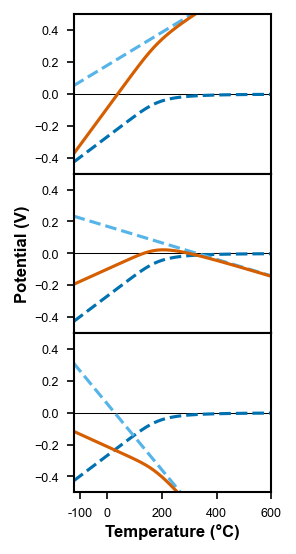

In [11]:
fig = plt.figure( figsize = (1.7, 4.1395))
gs = fig.add_gridspec(3, 1)
ax = gs.subplots(sharey=True, sharex=True)
fig.subplots_adjust(hspace=0)
eta_color = "#0072B2"
eq_color ="#56B4E9"
total_color = "#D55E00"

n = 2
i_operating = 10
i0298 = 0.1

Ts = np.linspace(150, 870)

ax[0].hlines(0, min(Ts-273.15), max(Ts-273.15), color = 'black', lw=0.5)
ax[1].hlines(0, min(Ts-273.15), max(Ts-273.15), color = 'black', lw=0.5)
ax[2].hlines(0, min(Ts-273.15), max(Ts-273.15), color = 'black', lw=0.5)

# Case 1
S = 200
H = 20000
Ea = 30000

etas, phi_eqs, phis = representative_potential(Ts, H, S, i_operating, i0298, n, Ea)
ax[0].plot(Ts-273.15, etas, color = eta_color, linestyle = "--")
ax[0].plot(Ts-273.15, phi_eqs, color = eq_color, linestyle = "--")
ax[0].plot(Ts-273.15, phis, color = total_color)

# Case 2
S = -100
H = -60000
Ea = 30000

etas, phi_eqs, phis = representative_potential(Ts, H, S, i_operating, i0298, n, Ea)

ax[1].plot(Ts-273.15, etas, color = eta_color, linestyle = "--")
ax[1].plot(Ts-273.15, phi_eqs , color = eq_color, linestyle = "--")
ax[1].plot(Ts-273.15, phis, color = total_color)

# Case 3
S = -400
H = -120000
Ea = 30000

etas, phi_eqs, phis = representative_potential(Ts, H, S, i_operating, i0298, n, Ea)

ax[2].plot(Ts-273.15, etas, label = "Overpotential" , color = eta_color, linestyle = "--")
ax[2].plot(Ts-273.15, phi_eqs, label = "Thermodynamic Potential" , color = eq_color, linestyle = "--")
ax[2].plot(Ts-273.15, phis, label = "Overall Potential", color = total_color)


# Labeling Axes
ax[2].set_xlabel("Temperature (°C)", fontsize = 8,fontweight="bold")
ax[1].set_ylabel("Potential (V)", fontsize = 8,fontweight="bold")

plt.ylim(-0.5, 0.5)
plt.xlim(min(Ts-273.15), max(Ts-273.15))

ax[0].set_xticks([-100, 0, 100, 200, 300], labels = [-100, 0, 100, 200, 300])
ax[1].set_xticks([-100, 0, 100, 200, 300], labels = [-100, 0, 100, 200, 300])
ax[2].set_xticks([-100, 0,  200,  400, 600], labels = [-100, 0,  200,  400, 600])

plt.savefig("figs/3cases.svg", bbox_inches='tight')

#### <a id='toc1_3_1_2_'></a>[$\frac{d\eta}{dT}$, Fig 2](#toc0_)

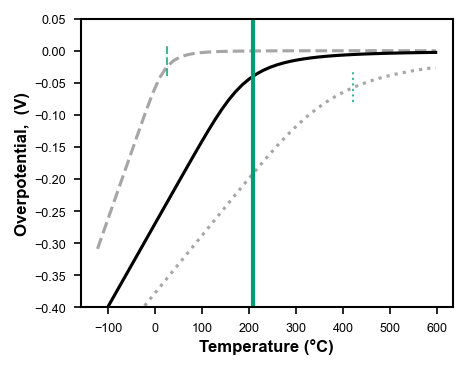

In [12]:
plt.figure(figsize=(3.2, 2.5))

etas, phi_eqs, phis = representative_potential(Ts, H, S, i_operating*10, i0298, n, Ea)
plt.plot(Ts-273.15, etas, color = "black", linestyle = ":", alpha = 0.35)
etas, phi_eqs, phis = representative_potential(Ts, H, S, i_operating, i0298, n, Ea)
plt.plot(Ts-273.15, etas, color = "black")
etas, phi_eqs, phis = representative_potential(Ts, H, S, i_operating/100, i0298, n, Ea)
plt.plot(Ts-273.15, etas, color = "black", linestyle = "--", alpha = 0.35)


plt.xlabel("Temperature (°C)")
plt.ylabel("Overpotential,  (V)")
plt.vlines(Ea*298/(Ea-298*R*np.log(100/.1))-273.15, -0.08, -0.03,lw=1 , color = "#009E73", linestyle = ":", alpha = 0.75)
plt.vlines(Ea*298/(Ea-298*R*np.log(10/.1))-273.15, -0.4, 0.05,lw=2 , color = "#009E73")
plt.vlines(Ea*298/(Ea-298*R*np.log(.1/.1))-273.15, -0.04, 0.01,lw=1 , color = "#009E73", linestyle = "--", alpha = 0.75)


plt.ylim(-0.4, 0.05)


plt.savefig(r"figs\Representativenvst.svg")

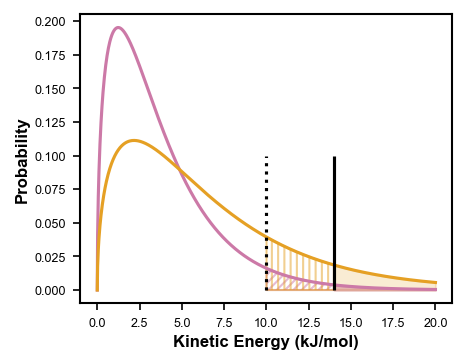

In [13]:
plt.figure(figsize=(3.2, 2.5))
Es = np.linspace(0, 20, 1000)
T1 = 25+273
c1 = "#CC79A7"
c2 ="#E5A024"
psRT = np.sqrt(4*Es/(np.pi*(0.001*8.314*T1)**3))*np.exp(-Es/(0.001*8.314*T1))
plt.plot(Es, psRT, color = c1)
plt.fill_between(Es[700:], psRT[700:], 0, alpha = 0.5, color = c1)


T2 = 250+273
ps = np.sqrt(4*Es/(np.pi*(0.001*8.314*T2)**3))*np.exp(-Es/(0.001*8.314*T2))
plt.plot(Es, ps, color = c2)
plt.fill_between(Es[700:], ps[700:], 0, alpha = 0.2, color = c2)

plt.fill_between(Es[500:700], psRT[500:700], 0, hatch = "//////", facecolor = "none", edgecolor = c1, alpha = 0.5)
plt.fill_between(Es[500:700], ps[500:700], 0, hatch = "||||", facecolor = "none", edgecolor = c2, alpha = 0.5)
plt.vlines(14, 0, 0.1, color = 'black')
plt.vlines(10, 0, 0.1, color = 'black', linestyle = ":")

plt.xlabel("Kinetic Energy (kJ/mol)")
plt.ylabel("Probability")
plt.savefig(r"figs\maxwell-boltzmann-constantoverpotential.svg")

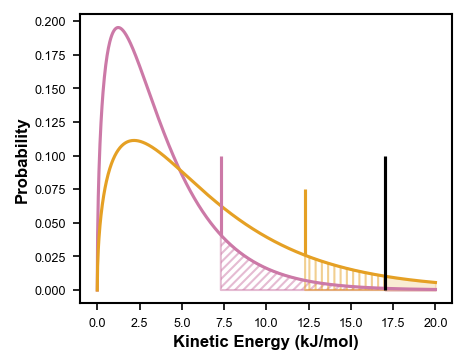

In [14]:
plt.figure(figsize=(3.2, 2.5))
Es = np.linspace(0, 20, 1000)
T1 = 25+273
c1 = "#CC79A7"
c2 ="#E5A024"

Ea = 17
idx1 = np.argmax(Es > Ea)

psRT = np.sqrt(4*Es/(np.pi*(0.001*8.314*T1)**3))*np.exp(-Es/(0.001*8.314*T1))
plt.plot(Es, psRT, color = c1)
plt.fill_between(Es[idx1:], psRT[idx1:], 0, alpha = 0.5, color = c1)


T2 = 250+273
ps = np.sqrt(4*Es/(np.pi*(0.001*8.314*T2)**3))*np.exp(-Es/(0.001*8.314*T2))
plt.plot(Es, ps, color = c2)

plt.fill_between(Es[idx1:], ps[idx1:], 0, alpha = 0.2, color = c2)

Ea_eta = 7.3
idx = np.argmax(Es > Ea_eta)
plt.fill_between(Es[idx:idx1], psRT[idx:idx1], 0, hatch = "//////", facecolor = "none", edgecolor = c1, alpha = 0.5)
plt.vlines(Ea_eta, psRT[idx], 0.1, color = c1)

Ea_eta = 12.29
idx = np.argmax(Es > Ea_eta)
plt.fill_between(Es[idx:idx1], ps[idx:idx1], 0, hatch = "||||", facecolor = "none", edgecolor = c2, alpha = 0.5)
plt.vlines(17, 0, 0.1, color = 'black')
plt.vlines(Ea_eta, ps[idx], 0.075, color = c2)

plt.xlabel("Kinetic Energy (kJ/mol)")
plt.ylabel("Probability")
plt.savefig(r"figs\maxwell-boltzmann.pdf")


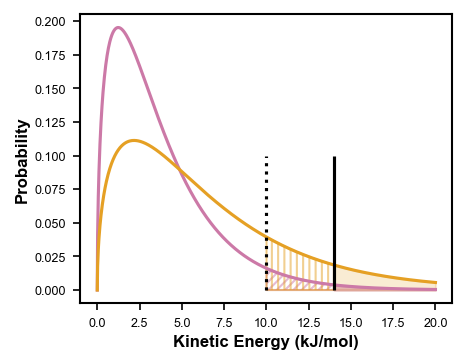

In [15]:
plt.figure(figsize=(3.2, 2.5))
Es = np.linspace(0, 20, 1000)
T1 = 25+273
c1 = "#CC79A7"
c2 ="#E5A024"
psRT = np.sqrt(4*Es/(np.pi*(0.001*8.314*T1)**3))*np.exp(-Es/(0.001*8.314*T1))
plt.plot(Es, psRT, color = c1)
plt.fill_between(Es[700:], psRT[700:], 0, alpha = 0.5, color = c1)


T2 = 250+273
ps = np.sqrt(4*Es/(np.pi*(0.001*8.314*T2)**3))*np.exp(-Es/(0.001*8.314*T2))
plt.plot(Es, ps, color = c2)
plt.fill_between(Es[700:], ps[700:], 0, alpha = 0.2, color = c2)

plt.fill_between(Es[500:700], psRT[500:700], 0, hatch = "//////", facecolor = "none", edgecolor = c1, alpha = 0.5)
plt.fill_between(Es[500:700], ps[500:700], 0, hatch = "||||", facecolor = "none", edgecolor = c2, alpha = 0.5)
plt.vlines(14, 0, 0.1, color = 'black')
plt.vlines(10, 0, 0.1, color = 'black', linestyle = ":")

plt.xlabel("Kinetic Energy (kJ/mol)")
plt.ylabel("Probability")
plt.savefig(r"figs\maxwell-boltzmann.svg")

### <a id='toc1_3_2_'></a>[Specific Reaction Visualizations](#toc0_)
#### <a id='toc1_3_2_1_'></a>[Overall Potential Curves, Figure 4 C](#toc0_)

<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\2218076368.py:29: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(Ts - 273.15, phis_CO_O2, label = "$\mathrm{CO_2 \longrightarrow CO + 1/2 O_2}$", color = "#009E73")
C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\2218076368.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(Ts - 273.15, phis_C2H4_H2O, label = "$\mathrm{2CO_2 + 6 H_2 \longrightarrow C_2H_4 + 4 H_2O}$", color = "#E69F00")
C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\2218076368.py:50: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(Ts - 273.15

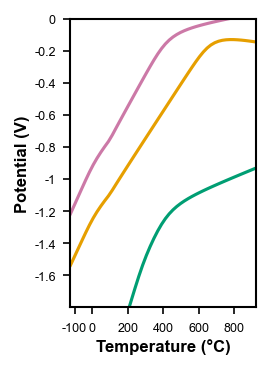

In [16]:
fig, ax = plt.subplots( figsize = (1.6, 2.5))  # match per-panel size

Ts = np.linspace(150, 1200)
i_operating = 100

i0298_CO2_CO = df_kin.loc[0]["i0298 mA/cm^2"]
Ea_CO2_CO = df_kin.loc[0]["Ea,eff J/mol"]
alpha_CO2_CO = 0.5 # reference has T dependence, 0.45 at RT and 0.56 at 250 C 

i0298_CO2_C2H4 = df_kin.loc[18]["i0298 mA/cm^2"]
Ea_CO2_C2H4 = df_kin.loc[18]["Ea,eff J/mol"]
alpha_CO2_C2H4 = 0.654

i0298_ORROER = df_kin.loc[9]["i0298 mA/cm^2"]
Ea_ORROER = df_kin.loc[9]["Ea,eff J/mol"]
alpha_OER = 0.84

i0298_HERHOR = df_kin.loc[5]["i0298 mA/cm^2"]
Ea_HERHOR = df_kin.loc[5]["Ea,eff J/mol"]
alpha_HERHOR = 0.5

# CO2 -> CO + 1/2 O2
S = df_rxns.loc[2]["Srxn, J/molK"]
H = df_rxns.loc[2]["Hrxn, kJ/mol"]*1000
n = df_rxns.loc[2]["n"]
etas_CO_O2, etaa_CO_O2, phi_eqs_CO_O2, phis_CO_O2 = experimental_potentials(Ts, H, S, i_operating, n,
                                                               i0298_CO2_CO, Ea_CO2_CO, alpha_CO2_CO,
                                                               i0298_ORROER, Ea_ORROER, alpha_OER)
ax.plot(Ts - 273.15, phis_CO_O2, label = "$\mathrm{CO_2 \longrightarrow CO + 1/2 O_2}$", color = "#009E73")


# 2 CO2 + 6 H2 -> C2H4 + 4 H2O
S = np.where(Ts<373, df_rxns.loc[10]["Srxn, J/molK"], df_rxns.loc[11]["Srxn, J/molK"])
H = np.where(Ts<373, df_rxns.loc[10]["Hrxn, kJ/mol"], df_rxns.loc[11]["Hrxn, kJ/mol"])*1000
n = df_rxns.loc[10]["n"]
etas_C2H4_H2O, etaa_C2H4_H2O, phi_eqs_C2H4_H2O, phis_C2H4_H2O = experimental_potentials(Ts, H, S, i_operating, n,
                                                                           i0298_CO2_C2H4, Ea_CO2_C2H4, alpha_CO2_C2H4,
                                                                           i0298_HERHOR, Ea_HERHOR, alpha_HERHOR)

ax.plot(Ts - 273.15, phis_C2H4_H2O, label = "$\mathrm{2CO_2 + 6 H_2 \longrightarrow C_2H_4 + 4 H_2O}$", color = "#E69F00")


# CO2 + H2 -> CO + H2O
S = np.where(Ts<373, df_rxns.loc[0]["Srxn, J/molK"], df_rxns.loc[1]["Srxn, J/molK"])
H = np.where(Ts<373, df_rxns.loc[0]["Hrxn, kJ/mol"], df_rxns.loc[1]["Hrxn, kJ/mol"])*1000
n = df_rxns.loc[0]["n"]
etas_CO_H2O, etaa_CO_H2O, phi_eqs_CO_H2O, phis_CO_H2O = experimental_potentials(Ts, H, S, i_operating, n,
                                                                   i0298_CO2_CO, Ea_CO2_CO, alpha_CO2_CO,
                                                                   i0298_HERHOR, Ea_HERHOR, alpha_HERHOR)
ax.plot(Ts - 273.15, phis_CO_H2O, label = "$\mathrm{CO_2 + H_2 \longrightarrow CO + H_2O}$", color ="#CC79A7" )

# Axes labels and ticks
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Potential (V)")
ax.set_xlim(min(Ts - 273.15), max(Ts - 273.15))
plt.ylim(-1.8, 0)
ax.set_xticks([-100, 0,  200,  400, 600, 800], labels = [-100, 0,  200,  400, 600, 800])

# Horizontal guideline
ax.set_yticks([-1.6, -1.4,-1.2,  -1, -0.8, -0.6 ,-0.4, -0.2, 0], labels = [-1.6, -1.4,-1.2,  -1, -0.8, -0.6 ,-0.4, -0.2, 0])
# Match legend style
#plt.legend()

#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon = False)
plt.savefig("figs\specreactions.svg")


#### <a id='toc1_3_2_2_'></a>[Construction of Curves, SI Fig](#toc0_)

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\123946475.py:6: SyntaxWarning: invalid escape sequence '\m'
  ax[0].plot(Ts-273.15, phis_CO_O2, label = "$\mathrm{CO_2 \longrightarrow CO + 1/2 O_2}$", color = total_color)
C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\123946475.py:13: SyntaxWarning: invalid escape sequence '\m'
  ax[1].plot(Ts - 273.15, phis_C2H4_H2O, label = "$\mathrm{2CO_2 + 6 H_2 \longrightarrow C_2H_4 + 4 H_2O}$", color = total_color)
C:\Users\vcane\AppData\Local\Temp\ipykernel_68088\123946475.py:21: SyntaxWarning: invalid escape sequence '\m'
  ax[2].plot(Ts - 2

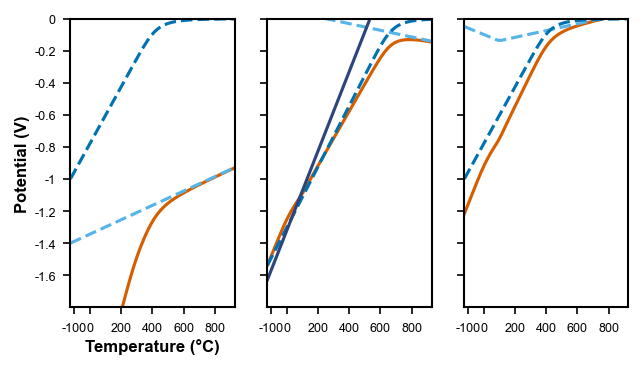

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (1.6*3, 2.5), sharey=True, sharex=True)  # match per-panel size

Ts = np.linspace(150, 1200)

# CO2 -> CO + 1/2 O2
ax[0].plot(Ts-273.15, phis_CO_O2, label = "$\mathrm{CO_2 \longrightarrow CO + 1/2 O_2}$", color = total_color)
ax[0].plot(Ts-273.15, phi_eqs_CO_O2, color = eq_color, linestyle = "--")
ax[0].plot(Ts-273.15, etas_CO_O2, color = eta_color, linestyle = "--")
ax[0].plot(Ts-273.15, etaa_CO_O2, color = eta_color, linestyle = ":")


# 2 CO2 + 6 H2 -> C2H4 + 4 H2O
ax[1].plot(Ts - 273.15, phis_C2H4_H2O, label = "$\mathrm{2CO_2 + 6 H_2 \longrightarrow C_2H_4 + 4 H_2O}$", color = total_color)
ax[1].plot(Ts-273.15, phi_eqs_C2H4_H2O, color = eq_color, linestyle = "--")
ax[1].plot(Ts-273.15, etas_C2H4_H2O, color = eta_color, linestyle = "--")
ax[1].plot(Ts-273.15, etaa_C2H4_H2O, color = eta_color, linestyle = ":")

ax[1].plot(Ts-273.15, Ts*0.00248-2)

# CO2 + H2 -> CO + H2O
ax[2].plot(Ts - 273.15, phis_CO_H2O, label = "$\mathrm{CO_2 + H_2 \longrightarrow CO + H_2O}$", color =total_color)
ax[2].plot(Ts-273.15, phi_eqs_CO_H2O, color = eq_color, linestyle = "--")
ax[2].plot(Ts-273.15, etas_CO_H2O, color = eta_color, linestyle = "--")
ax[2].plot(Ts-273.15, etaa_CO_H2O, color = eta_color, linestyle = ":")

# Axes labels and ticks
ax[0].set_xlabel("Temperature (°C)")
ax[0].set_ylabel("Potential (V)")
ax[0].set_xlim(min(Ts - 273.15), max(Ts - 273.15))
plt.ylim(-1.8, 0)
ax[0].set_xticks([-100, 0,  200,  400, 600, 800], labels = [-100, 0,  200,  400, 600, 800])


ax[0].set_yticks([-1.6, -1.4,-1.2,  -1, -0.8, -0.6 ,-0.4, -0.2, 0], labels = [-1.6, -1.4,-1.2,  -1, -0.8, -0.6 ,-0.4, -0.2, 0])
# Match legend style
#plt.legend()

#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon = False)
plt.savefig("figs\specreactions_construction.svg")


## <a id='toc1_4_'></a>[Power Visualizations](#toc0_)


When T is less than the boiling point of water,
$\dot{Q}_{water} = \frac{i}{nF}\left[c_p^{water}(T - 298)\right]$

When T is over the boiling point of water,
$\dot{Q}_{water} = \frac{i}{nF}\left[c_p^{water}(373 - 298) + \Delta H_{vap}^{water} + c_p^{water vapor}(T-373)\right]$

$\dot{Q}_{gas} = \frac{i}{nF}\left[c_p^{gas}(T - 298)\right]$

$\dot{Q}_{liquid} = \frac{i}{nF}\left[c_p^{liquid}(T - 298)\right]$

In general, we have estimated the heat capacity of gasses as $30 J/molK$ and liquids as $80 J/molK$. Additionally, $\Delta H_{vap}^{water} = 44 kJ/mol$. The prefactor $\frac{i}{nF}$ ensures that the units of all $\dot{Q}$ is in $W/m^2$, where the area specific nature comes from the current density.

Ohmic losses are calculated based on the current density and the area specific resistance. In this analysis, we use $0.1 \Omega cm^2$, a representative value for Nafion membranes. Below, it has been converted to $\Omega m^2$ as numerical calculations in this method are normalized to $m^2$ until plotting.



In [18]:
cp_gas = 30
cp_liquid = 80
hvap_water = 44000

def water_heating(T, i, n):
    return i/(n*F)* np.where(T<373, cp_liquid*(T-298), cp_liquid*(373-298) + hvap_water + cp_gas *(T-373))

def gas_heating(T, i, n):
    return i/(n*F) * cp_gas*(T-298)

def liquid_heating(T, i, n):
    return i/(n*F) *cp_gas*(T-298)

def resistive_heating(R_ohmic, i):
    return i**2 * (R_ohmic/100**2)

def entropic_heating(Srxn, T, i, n):
    return -i/(n*F)*Srxn*T

In [19]:
Ts = np.linspace(300, 800+273, 200)
currents = np.logspace(1, np.log10(20000), 199)
ts, curs = np.meshgrid(Ts, currents)

colors = [ "#009E73" ,  "#F0E442", "#d55e00"]
custom_viridis = mcolors.LinearSegmentedColormap.from_list('custom_div', colors, N=256)

colors = ["#0072b2", "#FFFFFF", "#d55e00"]  # blue -> white -> red
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_div', colors, N=256)
zmin = 0.1
zmax = 2.5
norm = mcolors.TwoSlopeNorm(vmin=zmin, vcenter=1, vmax=zmax)
cmap = custom_cmap


$$
\dot{Q}_{reactants} = \dot{Q}_{water} + \dot{Q}_{gas} + \dot{Q}_{liquid}
$$
$$
        \dot{Q}_{cell} =- i\frac{T\Delta S_{rxn}}{nF}-i(\eta_c -\eta_a) + i^2 R_\Omega
$$
#### <a id='toc1_4_1_1_'></a>[Unavoidable Heat to Reactant Heating Requirement, Water Splitting, Fig 5c](#toc0_)

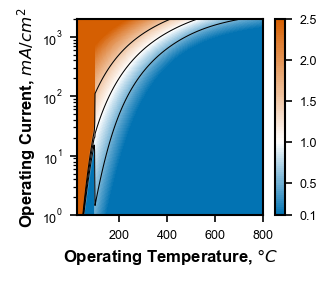

In [ ]:
etas_O2_H2, etaa_O2_H2 = overpotentials(ts, curs,
                                        i0298_HERHOR, Ea_HERHOR, alpha_HERHOR,
                                        i0298_ORROER, Ea_ORROER, alpha_OER)
n=2
reactant_heating_H2O = water_heating(ts, curs, n)
unavoidable_heat = (entropic_heating(np.where(ts<373, -df_rxns.loc[14]["Srxn, J/molK"], -df_rxns.loc[15]["Srxn, J/molK"]), ts, curs, n)
                    - curs*(etas_O2_H2-etaa_O2_H2)
                    + resistive_heating(0.1, curs))

ratio_H2O=unavoidable_heat/reactant_heating_H2O

ratio_H2O = np.where(ratio_H2O>zmax, zmax, ratio_H2O)
ratio_H2O = np.where(ratio_H2O<zmin, zmin, ratio_H2O)
fig, ax = plt.subplots(figsize=(2,1.7))
CS = ax.contourf(ts-273, curs/10, ratio_H2O, levels = 100, cmap=cmap, norm = norm)
cbar = fig.colorbar(CS, ticks= [0.1,  0.5, 1.0, 1.5, 2, 2.5])
ax.set_yscale('log')

lines = ax.contour(ts-273, curs/10, ratio_H2O, levels = [0.5, 1, 1.5], colors='black', linewidths = 0.5)
custom_labels={0.5:'50%', 1:'100%', 1.5:'150%'}

plt.xlabel(r"Operating Temperature, $\degree C$")
plt.ylabel(r"Operating Current, $mA/cm^2$")
#plt.suptitle("Ratio of Unavoidable Heat Evolved to Reactant Heating Requirement")
#plt.title("Water Splitting")
plt.savefig(r"figs\water_splitting.svg")



#### <a id='toc1_4_1_3_'></a>[Unavoidable Heat to Reactant Heating Requirement, CO2R to C2H4 with OER, Fig 5c](#toc0_)

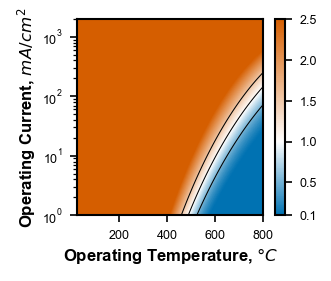

In [119]:
etas_C2H4, etaa_C2H4 = overpotentials(ts, curs,
                                          i0298_CO2_C2H4, Ea_CO2_C2H4, alpha_CO2_C2H4,
                                          i0298_ORROER, Ea_ORROER, alpha_OER)

n = 12

reactant_heating_C2H4 = 2 * water_heating(ts, curs, n) + 2 * gas_heating(ts, curs, n)
unavoidable_heat_C2H4 = (resistive_heating(.1, curs)
                    - curs*(etas_C2H4-etaa_C2H4)
                    + entropic_heating(np.where(ts<373, df_rxns.loc[12]["Srxn, J/molK"], df_rxns.loc[13]["Srxn, J/molK"]) , ts, curs, n))

ratio_C2H4=unavoidable_heat_C2H4/reactant_heating_C2H4

ratio_C2H4 = np.where(ratio_C2H4>zmax, zmax, ratio_C2H4)
ratio_C2H4 = np.where(ratio_C2H4<zmin, zmin, ratio_C2H4)

fig, ax = plt.subplots(figsize=(2,1.7))
CS = ax.contourf(ts-273, curs/10, ratio_C2H4, levels = 300,cmap=cmap, norm = norm)

cbar = fig.colorbar(CS, ticks= [0.1,  0.5, 1.0, 1.5, 2, 2.5])
ax.set_yscale('log')

lines = ax.contour(ts-273, curs/10, ratio_C2H4, levels = [0.5, 1, 1.5], colors='black', linewidths = 0.5)
custom_labels={0.5:'50%', 1:'100%', 1.5:'150%'}


plt.xlabel(r"Operating Temperature, $\degree C$")
plt.ylabel(r"Operating Current, $mA/cm^2$")
#plt.suptitle("Ratio of Unavoidable Heat Evolved to Reactant Heating Requirement")
plt.savefig(r"figs\C2H4.svg")

$$

    P_{total}= \begin{cases} 
      i\frac{\Delta H_{rxn}}{nF}+\dot{Q}_{reactant} & 0<\dot{Q}_{external} \\
      i\frac{\Delta H_{rxn}}{nF} + \dot{Q}_{cell} + \frac{1}{\epsilon}\left(\dot{Q}_{cell} -\dot{Q}_{reactant} \right) & 0>\dot{Q}_{external} \\
   \end{cases}
$$

$$P_{excess} = \frac{P_{total}-\frac{i}{nF}\Delta H_{rxn}}{i/(nF)}$$

#### <a id='toc1_4_1_2_'></a>[Excess Power Requirement, Water Splitting, SI Fig](#toc0_)

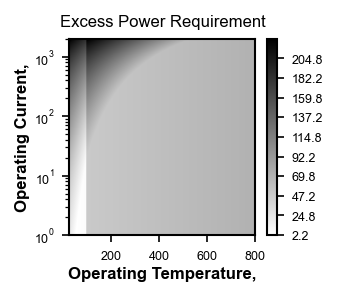

In [22]:
eps = 2
n = 2 # Cooling Coefficient of Performance
fig, ax = plt.subplots(figsize=(2,1.7))
excess_power = np.where(reactant_heating_H2O>unavoidable_heat, reactant_heating_H2O, unavoidable_heat*(1+1/eps)-1/eps*reactant_heating_H2O )/(curs/(n*F))/1000

CS = ax.contourf(ts-273, curs/10, excess_power,cmap = 'binary', levels = 1000)
cbar = fig.colorbar(CS)


ax.set_yscale('log')
plt.xlabel("Operating Temperature,")
plt.ylabel("Operating Current,")
plt.title("Excess Power Requirement")
plt.savefig(r"figs\water_splitting_excesspower.svg")

#### <a id='toc1_4_1_4_'></a>[Excess Power Requirement, CO2R to C2H4 with OER, SI Fig](#toc0_)

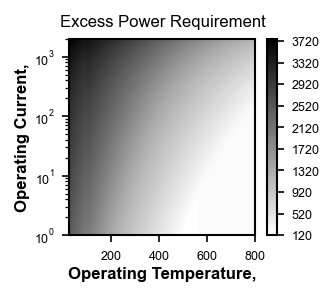

In [23]:
n=12
excess_power_C2H4 = np.where(reactant_heating_C2H4>unavoidable_heat_C2H4, reactant_heating_C2H4, unavoidable_heat_C2H4*(1+1/eps)-1/eps*reactant_heating_C2H4)/(curs/(n*F))/1000


fig, ax = plt.subplots(figsize=(2,1.7))
CS = ax.contourf(ts-273, curs/10, excess_power_C2H4, cmap = 'binary', levels = 100)
cbar = fig.colorbar(CS)

ax.set_yscale('log')
plt.xlabel("Operating Temperature,")
plt.ylabel("Operating Current,")
plt.title("Excess Power Requirement")
plt.savefig(r"figs\C2H4_excesspower.svg")


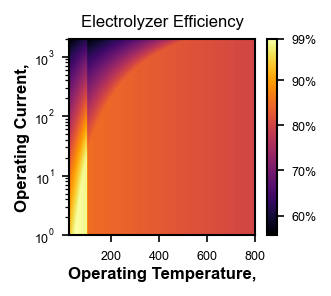

In [96]:
eps = 2
n = 2 # Cooling Coefficient of Performance
fig, ax = plt.subplots(figsize=(2,1.7))
excess_power = np.where(reactant_heating_H2O>unavoidable_heat, reactant_heating_H2O, unavoidable_heat*(1+1/eps)-1/eps*reactant_heating_H2O )/(curs/(n*F))/1000

CS = ax.contourf(ts-273, curs/10, 285/(285+excess_power)*100,cmap = 'inferno', levels = 1000)
cbar = fig.colorbar(CS, ticks=[60, 70, 80, 90, 100, np.max(285/(285+excess_power)*100)])
cbar.ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


ax.set_yscale('log')
plt.xlabel("Operating Temperature,")
plt.ylabel("Operating Current,")
plt.title("Electrolyzer Efficiency")
plt.savefig(r"figs\H2O_efficiency.svg")

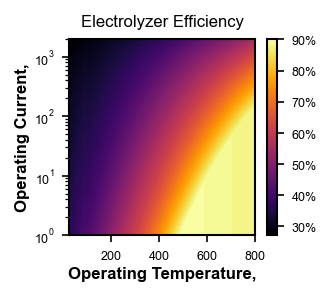

In [116]:
n=12
excess_power_C2H4 = np.where(reactant_heating_C2H4>unavoidable_heat_C2H4, reactant_heating_C2H4, unavoidable_heat_C2H4*(1+1/eps)-1/eps*reactant_heating_C2H4)/(curs/(n*F))/1000


fig, ax = plt.subplots(figsize=(2,1.7))
CS = ax.contourf(ts-273, curs/10, 1400/(1400+excess_power_C2H4)*100, cmap = 'inferno', levels = 100)
cbar = fig.colorbar(CS, ticks=[30, 40, 50, 60, 70, 80, np.max(1400/(1400+excess_power_C2H4)*100)])
cbar.ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.set_yscale('log')
plt.xlabel("Operating Temperature,")
plt.ylabel("Operating Current,")
plt.title("Electrolyzer Efficiency")

plt.savefig(r"figs\C2H4_efficiency.svg")

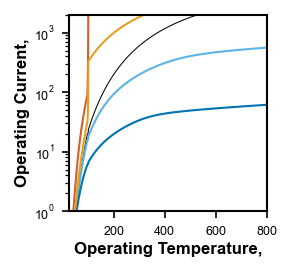

In [26]:
fig, ax = plt.subplots(figsize=(1.7,1.7))
ax.set_yscale('log')
n=2
lines = ax.contour(ts-273, curs/10, ratio_H2O, levels = [1], colors='black', linewidths = 0.5)

# Higher Resistance
unavoidable_heat_HighR = (entropic_heating(np.where(ts<373, -df_rxns.loc[14]["Srxn, J/molK"], -df_rxns.loc[15]["Srxn, J/molK"]), ts, curs, n)
                    - curs*(etas_O2_H2-etaa_O2_H2)
                    + resistive_heating(0.1*10, curs))

unavoidable_heat_HigherR = (entropic_heating(np.where(ts<373, -df_rxns.loc[14]["Srxn, J/molK"], -df_rxns.loc[15]["Srxn, J/molK"]), ts, curs, n)
                    - curs*(etas_O2_H2-etaa_O2_H2)
                    + resistive_heating(0.1*100, curs))

ratio_H2O_HighR = unavoidable_heat_HighR/reactant_heating_H2O

# 20 % Conversion, No heat recovery from unreacted material
ratio_H2O_20conv = unavoidable_heat/(reactant_heating_H2O*5)

# 50% Conversion, No heat recovery from unreacted material
ratio_H2O_50conv = unavoidable_heat/(reactant_heating_H2O*2)

# High R, 50% Conversion
ratio_H2O_higherR = unavoidable_heat_HigherR/(reactant_heating_H2O)


lines = ax.contour(ts-273, curs/10, ratio_H2O_HighR, levels = [1], colors='#5AB4E5', linewidths = 1)
lines = ax.contour(ts-273, curs/10, ratio_H2O_higherR, levels = [1], colors='#0073B2', linewidths = 1)

lines = ax.contour(ts-273, curs/10, ratio_H2O_20conv, levels = [1], colors='#D36027', linewidths = 1)
lines = ax.contour(ts-273, curs/10, ratio_H2O_50conv, levels = [1], colors='#E5A024', linewidths = 1)


plt.xlabel("Operating Temperature,")
plt.ylabel("Operating Current,")
plt.savefig(r"figs\H2O_perturbations.svg")

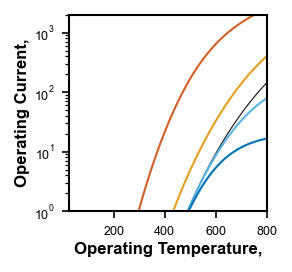

In [27]:
fig, ax = plt.subplots(figsize=(1.7,1.7))
ax.set_yscale('log')
n=12
lines = ax.contour(ts-273, curs/10, ratio_C2H4, levels = [1], colors='black', linewidths = 0.5)

# Higher Resistance
unavoidable_heat_C2H4_highR = (resistive_heating(.1*10, curs)
                    - curs*(etas_C2H4-etaa_C2H4)
                    + entropic_heating(np.where(ts<373, df_rxns.loc[12]["Srxn, J/molK"], df_rxns.loc[13]["Srxn, J/molK"]) , ts, curs, n))

unavoidable_heat_C2H4_higherR = (resistive_heating(.1*100, curs)
                    - curs*(etas_C2H4-etaa_C2H4)
                    + entropic_heating(np.where(ts<373, df_rxns.loc[12]["Srxn, J/molK"], df_rxns.loc[13]["Srxn, J/molK"]) , ts, curs, n))

ratio_H2O_HighR_C2H4 = unavoidable_heat_C2H4_highR/reactant_heating_C2H4

# 20 % Conversion, No heat recovery from unreacted material
ratio_H2O_20conv_C2H4 = unavoidable_heat_C2H4/(reactant_heating_C2H4*5)

# 50% Conversion, No heat recovery from unreacted material
ratio_H2O_50conv_C2H4 = unavoidable_heat_C2H4/(reactant_heating_C2H4*2)

# High R, 50% Conversion
ratio_H2O_higherR_C2H4 = unavoidable_heat_C2H4_higherR/(reactant_heating_C2H4)


lines = ax.contour(ts-273, curs/10, ratio_H2O_HighR_C2H4, levels = [1], colors='#5AB4E5', linewidths = 1)
lines = ax.contour(ts-273, curs/10, ratio_H2O_higherR_C2H4, levels = [1], colors='#0073B2', linewidths = 1)

lines = ax.contour(ts-273, curs/10, ratio_H2O_20conv_C2H4, levels = [1], colors='#D36027', linewidths = 1)
lines = ax.contour(ts-273, curs/10, ratio_H2O_50conv_C2H4, levels = [1], colors='#E5A024', linewidths = 1)


plt.xlabel("Operating Temperature,")
plt.ylabel("Operating Current,")
plt.savefig(r"figs\C2H4_perturbations.svg")